In [103]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, MaxPooling2D, Flatten
from PIL import Image
import glob
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import json
from pprint import pprint

In [104]:
num_imgs = 10

img_size = 32
num_objects = 2

imgs = np.zeros((num_imgs, img_size, img_size, 4), dtype=np.uint8)  # format: BGRA
shapes = np.zeros((num_imgs, num_objects), dtype=int)
num_shapes = 13
num_text = 36
shape_labels = ['circle', 'semicircle', 'quartercircle', 'triangle', 'square', 'rectangle', 'trapezoid', 'pentagon', 'hexagon', 'heptagon', 'octagon', 'star', 'cross']
text_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
               '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = np.zeros((num_imgs, num_objects), dtype=int)
num_colors = 3
color_labels = ['r', 'g', 'b']


In [105]:
def getImgs(imgs_path):
    imgs = []
    for filename in glob.glob(imgs_path):
        img = cv2.imread(filename)
        imgs.append(img)
    return np.array(imgs)

def getLabels(labels_path):
    labels = []
    for filename in glob.glob(labels_path):
        with open(filename) as file:
            label = json.load(file)
            #labels.append([label['shape_type'], label['character']])
            labels.append([shape_labels.index(label['shape_type'])])
    return np.array(labels)
      
imgs_path = '../cnn_training_data/*.jpg';
labels_path = '../cnn_training_data/*.json';

data = getImgs(imgs_path)
label = keras.utils.to_categorical(getLabels(labels_path), num_classes=13)

train_d = data[:(int) (data.shape[0]*0.8),...] 
train_l = label[:(int) (data.shape[0]*0.8),...] 
test_d = data[(int) (data.shape[0]*0.8):,...] 
test_l = label[(int) (data.shape[0]*0.8):,...] 

print(train_d.shape)
print(train_l.shape)
print(test_d.shape)
print(test_l.shape)

print(train_data.shape)
print(train_labels.shape)


data_shape = data[0].shape
label_shape = label.shape[-1]

(307, 40, 40, 3)
(307, 13)
(77, 40, 40, 3)
(77, 13)
(384, 40, 40, 3)
(384, 13)


In [100]:
# TODO: Make one run with very deep network (~10 layers).
filter_size = 3
pool_size = 2





# TODO: Make one run with very deep network (~10 layers).
filter_size = 3
pool_size = 2

# TODO: Maybe remove pooling bc it takes away the spatial information.

model = Sequential([
        Convolution2D(32, 6, 6, input_shape=data_shape, dim_ordering='tf', activation='relu'), 
        MaxPooling2D(pool_size=(pool_size, pool_size)), 
        Convolution2D(64, filter_size, filter_size, dim_ordering='tf', activation='relu'), 
        MaxPooling2D(pool_size=(pool_size, pool_size)), 
        Convolution2D(128, filter_size, filter_size, dim_ordering='tf', activation='relu'), 
# #         MaxPooling2D(pool_size=(pool_size, pool_size)), 
        Convolution2D(128, filter_size, filter_size, dim_ordering='tf', activation='relu'), 
# #         MaxPooling2D(pool_size=(pool_size, pool_size)), 
        Flatten(), 
        Dropout(0.4), 
        Dense(256, activation='relu'), 
        Dropout(0.4), 
        Dense(label_shape)
    ])

#model.compile('adadelta', 'mse')
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


#model.save_weights('bottleneck_fc_model.h5')
model.fit(train_d, train_l, epochs=100, batch_size=128, verbose=2)



/home/kratos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (6, 6), activation="relu", data_format="channels_last", input_shape=(40, 40, 3...)`
  app.launch_new_instance()
/home/kratos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", data_format="channels_last")`
/home/kratos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", data_format="channels_last")`
/home/kratos/.local/lib/python2.7/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", data_format="channels_last")`


Epoch 1/100
 - 4s - loss: 7.4673 - acc: 0.0749
Epoch 2/100
 - 2s - loss: 8.4059 - acc: 0.0945
Epoch 3/100
 - 2s - loss: 7.4330 - acc: 0.0619
Epoch 4/100
 - 3s - loss: 7.9761 - acc: 0.0717
Epoch 5/100
 - 3s - loss: 8.2695 - acc: 0.0684
Epoch 6/100
 - 3s - loss: 8.3649 - acc: 0.0879
Epoch 7/100
 - 3s - loss: 8.7416 - acc: 0.1107
Epoch 8/100
 - 3s - loss: 7.9969 - acc: 0.0847
Epoch 9/100
 - 3s - loss: 8.3007 - acc: 0.0879
Epoch 10/100
 - 3s - loss: 7.3854 - acc: 0.0912
Epoch 11/100
 - 4s - loss: 8.0791 - acc: 0.0684
Epoch 12/100
 - 3s - loss: 7.7741 - acc: 0.0717
Epoch 13/100
 - 4s - loss: 8.0834 - acc: 0.0782
Epoch 14/100
 - 5s - loss: 7.8269 - acc: 0.0814
Epoch 15/100
 - 4s - loss: 8.2505 - acc: 0.0977
Epoch 16/100
 - 3s - loss: 8.0140 - acc: 0.0684
Epoch 17/100
 - 3s - loss: 7.3711 - acc: 0.0847
Epoch 18/100
 - 3s - loss: 8.6444 - acc: 0.0749
Epoch 19/100
 - 2s - loss: 8.0770 - acc: 0.0717
Epoch 20/100
 - 3s - loss: 8.8495 - acc: 0.0684
Epoch 21/100
 - 2s - loss: 8.2704 - acc: 0.0521
E

In [111]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Convolution2D(32, (5, 5), activation='relu', input_shape=data_shape))
model.add(Convolution2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(13, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(train_d, train_l, batch_size=32, epochs=100)
score = model.evaluate(test_d, test_l, batch_size=32)


Epoch 1/100
307/307 [==============================] - 10s 31ms/step - loss: 14.6165 - acc: 0.0879
Epoch 2/100
307/307 [==============================] - 8s 25ms/step - loss: 14.8580 - acc: 0.0782
Epoch 3/100
307/307 [==============================] - 10s 34ms/step - loss: 15.1206 - acc: 0.0619
Epoch 4/100
307/307 [==============================] - 11s 35ms/step - loss: 14.7530 - acc: 0.0847
Epoch 5/100
307/307 [==============================] - 11s 37ms/step - loss: 14.8055 - acc: 0.0814
Epoch 6/100
307/307 [==============================] - 10s 31ms/step - loss: 14.7530 - acc: 0.0847
Epoch 7/100
307/307 [==============================] - 10s 34ms/step - loss: 14.7530 - acc: 0.0847
Epoch 8/100
307/307 [==============================] - 9s 30ms/step - loss: 14.8580 - acc: 0.0782
Epoch 9/100
307/307 [==============================] - 9s 28ms/step - loss: 14.9106 - acc: 0.0749
Epoch 10/100
307/307 [==============================] - 8s 26ms/step - loss: 15.0156 - acc: 0.0684
Epoch 11/100


KeyboardInterrupt: 

In [69]:

model.save_weights('first_try.h5')  # always save your weights after training or during training


NameError: name 'mnist' is not defined

In [24]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


estimator = KerasClassifier(build_fn=model, epochs=200, batch_size=5, verbose=0)

[[6]
 [6]
 [6]
 [4]
 [9]
 [6]
 [4]
 [7]
 [5]
 [4]]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


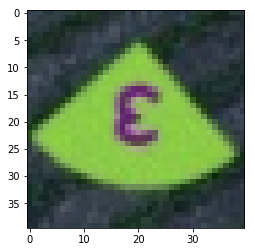

In [9]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("../cnn_training_data/0UmapByoNpPNzV3E.jpg")

plt.imshow(img)

In [34]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("../cnn_training_data/1khX3CHvrgJqnIvV.jpg")
"""gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)"""
print(img)
img.shape

[[[ 71  84 110]
  [ 52  66  88]
  [ 51  69  86]
  ...
  [ 77  98 113]
  [ 84 103 118]
  [ 54  73  88]]

 [[ 71  85 108]
  [ 67  81 103]
  [ 60  79  94]
  ...
  [ 74  95 110]
  [ 87 106 121]
  [ 77  96 111]]

 [[ 71  85 107]
  [ 70  85 104]
  [ 73  92 107]
  ...
  [ 67  87 104]
  [ 75  96 111]
  [ 90 111 126]]

 ...

 [[ 43  53  70]
  [ 59  72  88]
  [ 61  77  93]
  ...
  [ 88 112 130]
  [ 98 121 137]
  [ 97 120 136]]

 [[ 48  59  73]
  [ 60  73  87]
  [ 50  66  82]
  ...
  [ 66  88 106]
  [ 81 104 120]
  [ 89 112 128]]

 [[ 68  80  92]
  [ 66  79  93]
  [ 38  57  72]
  ...
  [ 54  76  94]
  [ 53  76  92]
  [ 68  91 107]]]


(40, 40, 3)

In [72]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

(train_x, train_y) , (test_x, test_y) = mnist.load_data()
#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)

model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))

model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])
#model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)

#accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)

#print("Accuracy: ",accuracy[1])

11501568/11490434 [==============================] - 13s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
